### MNIST dataset -   Fully Connected Feedforward Neural Network 

Recognition of Hand Written Digits from MNIST dataset

Inputs: images of 28 x 28 pixels; 

Output: class representing the digit (10 classes, digits 0-9);

60k images for training;  10k images for test

To run this example you need to install tensorflow (e.g pip install tensorflow)


<img src="images/f1.png" style="width:350px;height:250px;">
<caption><center> Fig. 1: Examples from MNIST handwritten digit dataset </center></caption>

### Load the dataset

In [9]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

#Check data dimensions

print("Train Images Shape: ", train_images.shape)
print("Train Labels Shape: ", train_labels.shape)
print("Test Images Shape: ", test_images.shape)
print("Test Labels Shape: ", test_labels.shape)

Train Images Shape:  (60000, 28, 28)
Train Labels Shape:  (60000,)
Test Images Shape:  (10000, 28, 28)
Test Labels Shape:  (10000,)


### Data pre-processing

**Multi-class Classification problem => One-hot encoding of outputs**

In [17]:
# Reshape to make the images into 1D vector  for each example
train_images = train_images.reshape((60000, 28 * 28))

#Standardize values /255
train_images = train_images.astype('float32') / 255

#Convert outputs (check what happens with the labels ?)
train_labels = to_categorical(train_labels)

#Do the same for the test data

?
test_images = test_images.reshape((10000, 28 * 28))

test_images = test_images.astype('float32') / 255

test_labels = to_categorical(test_labels)


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

In [19]:
print(train_labels[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Model structure (feedforward Neural Network - FFNN)

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

#One hidden layer with 512 neurons (RelU)
network.add(layers.Dense(512, activation='relu', 
                         input_shape=(28 * 28,)))

# Output layer with 10 neurons
# (softmax = 1 neuron w/ sigmoid function for each class;one-hot encoding )
network.add(layers.Dense(10, activation='softmax'))

network.summary()


D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### NN training

In [23]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#train the model (fit)
history= network.fit(train_images, train_labels, epochs=15, batch_size=128)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8734 - loss: 0.4359
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9677 - loss: 0.1107
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9792 - loss: 0.0693
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9856 - loss: 0.0486
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9888 - loss: 0.0378
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9923 - loss: 0.0265
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9941 - loss: 0.0204
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9963 - loss: 0.0150
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9972 - loss: 0.0114
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9983 - loss: 0.0080
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9990 - loss: 0.0058
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/st

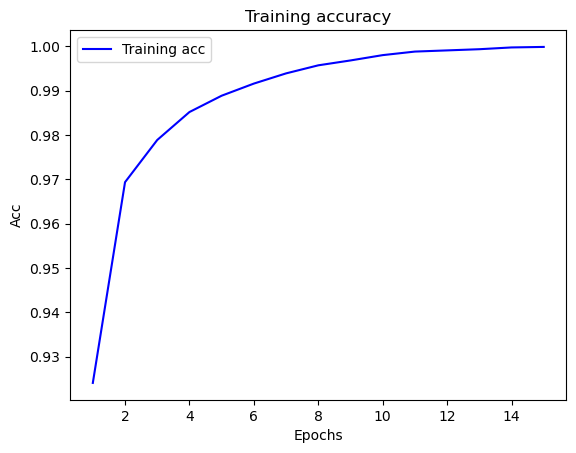

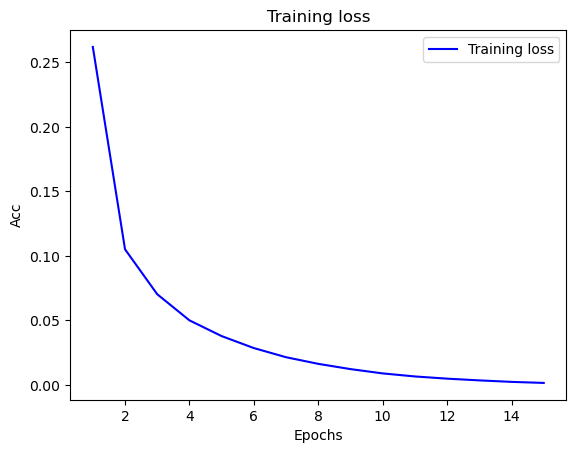

(Text(0.5, 24.0, 'Epochs'),
 Text(24.000000000000007, 0.5, 'Acc'),
 None)

In [27]:
#history_dict = history.history
acc_values = history.history['accuracy'] 
loss_values = history.history['loss'] 

epochs = range(1, len(acc_values) + 1)


plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs'), plt.ylabel('Acc'), plt.legend(),plt.show()


#Plot the training loss

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs'), plt.ylabel('Acc'), plt.legend(),plt.show()

In [33]:
#What is the result of this line of code ?

test_preds = network.predict(test_images)

print(test_preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)


In [35]:
#What is the result of this line of code ?

test_classes = np.argmax(network.predict(test_images), axis=-1)

print(test_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[7 2 1 ... 4 5 6]


In [39]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print(test_loss, test_acc)
#Compare the test and train loss and accuracy 

train_loss, train_acc = network.evaluate(train_images, train_labels)

print(train_loss, train_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9783 - loss: 0.0823
0.06617780029773712 0.982200026512146
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9997 - loss: 0.0015
0.0014472343027591705 0.9998166561126709
